In [7]:
import xarray as xr # reads and handles netcdf files with metadata
import numpy as np   # module for numerical computing
import pandas as pd # module for data manipulation and analysis
import geopandas as gpd
import matplotlib.pyplot as plt  #essential for plotting
import cartopy.crs as ccrs  #important for  map projections
import netCDF4 as nc

In [8]:
path1 = "C:/Users/user/Downloads/Met_data/pcp_S_Korea_1970-2020_Monthly.nc"
path2 = "C:/Users/user/Downloads/Met_data/T_RH_q_S_Korea_1970-2020_monthly.nc"
country = "South_Korea"

data1 = xr.open_dataset(path1)
data2 = xr.open_dataset(path2)

pr = data1['tp'] * 1000
print(pr.shape)
jjas_data_pr = pr.sel(time=pr['time'].dt.month.isin([6,7,8,9]))
print(jjas_data_pr.shape)

(612, 17, 14)
(204, 17, 14)


In [9]:
jjas_pr = jjas_data_pr.resample(time='1Y').mean()
jjas_pr

<xarray.DataArray 'tp' (time: 51, latitude: 17, longitude: 14)>
array([[[ 7.3184295,  7.90256  ,  8.400224 , ...,  7.6752987,
          7.180005 ,  7.248459 ],
        [ 7.618127 ,  8.191734 ,  8.422219 , ...,  7.857146 ,
          6.9430723,  6.941271 ],
        [ 8.337837 ,  8.194294 ,  8.373867 , ...,  8.291191 ,
          7.490701 ,  6.22431  ],
        ...,
        [ 6.646883 ,  7.0219555,  7.8450103, ...,  8.1558   ,
          7.719764 ,  7.93764  ],
        [ 6.794409 ,  7.233195 ,  7.3417535, ...,  7.4505014,
          7.6957774,  7.9452257],
        [ 6.6260242,  6.711544 ,  6.7518387, ...,  7.1124053,
          7.4247127,  7.780823 ]],

       [[ 8.096449 ,  8.84574  ,  9.397257 , ...,  5.5348444,
          4.783277 ,  4.6514897],
        [ 7.9163074,  8.6542225,  9.201662 , ...,  5.5161667,
          4.53108  ,  4.369901 ],
        [ 8.357748 ,  8.669771 ,  9.220908 , ...,  6.0574427,
          5.146593 ,  4.0559816],
...
        [ 6.577102 ,  6.6866093,  6.8421936, ...,  9.316668 ,
          9.1748295,  9.63893  ],
        [ 6.5116825,  6.6709647,  6.894909 , ...,  9.028347 ,
          9.295335 ,  9.786077 ],
        [ 6.462096 ,  6.5018225,  6.721594 , ...,  8.874089 ,
          9.170374 ,  9.677708 ]],

       [[ 9.052145 ,  9.812244 , 10.408796 , ...,  7.580961 ,
          6.281861 ,  5.6954536],
        [ 9.083431 ,  9.847514 ,  9.797359 , ...,  7.91792  ,
          6.388997 ,  5.755659 ],
        [ 9.484767 ,  9.574268 ,  9.480406 , ...,  8.877787 ,
          7.4522085,  5.7008586],
        ...,
        [ 7.8339176,  8.281047 ,  8.762212 , ...,  8.7188835,
          8.115506 ,  8.106878 ],
        [ 7.7996902,  8.333571 ,  8.28446  , ...,  7.884641 ,
          7.816472 ,  7.8273754],
        [ 7.65444  ,  7.890235 ,  7.805379 , ...,  7.680134 ,
          7.678048 ,  7.978978 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 126.1 126.4 126.6 126.9 ... 128.9 129.1 129.4
  * latitude   (latitude) float32 38.39 38.14 37.89 37.64 ... 34.89 34.64 34.39
  * time       (time) datetime64[ns] 1970-12-31 1971-12-31 ... 2020-12-31

In [10]:
Spatial_mean_jjas_pr = jjas_pr.mean(dim=['latitude','longitude'])
Spatial_mean_jjas_pr
years = Spatial_mean_jjas_pr["time.year"]

In [11]:
from scipy.stats import linregress
from matplotlib.pyplot import Line2D
slope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_pr)

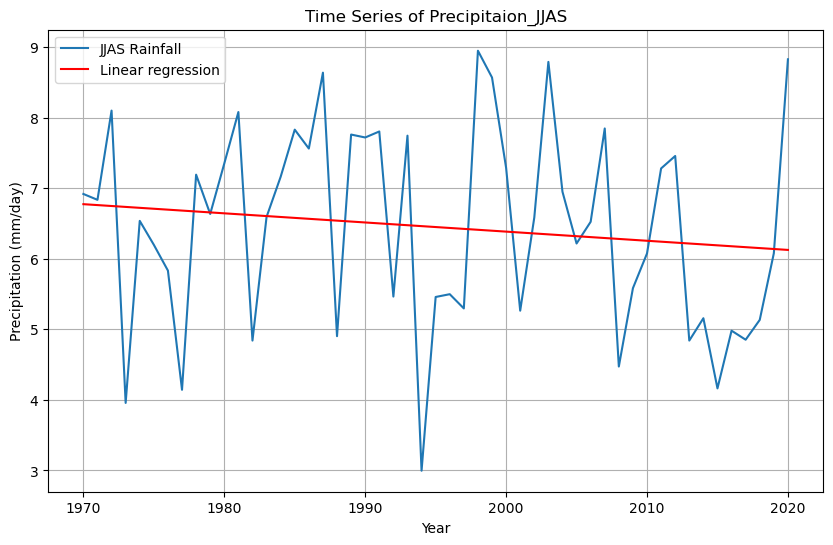

-0.13342269940965557
0.3506190720162121


In [12]:
plt.figure(figsize=(10,6))
plt.plot(years,Spatial_mean_jjas_pr,label="JJAS Rainfall")
plt.plot(years,slope*years+intercept,label="Linear regression",color='red')
plt.xlabel("Year")
plt.ylabel("Precipitation (mm/day)")
plt.title("Time Series of Precipitaion_JJAS")
plt.legend()
plt.grid(True)
plt.savefig("Time Series of Precipitation")
plt.show()

print(r_value)
print(p_value)

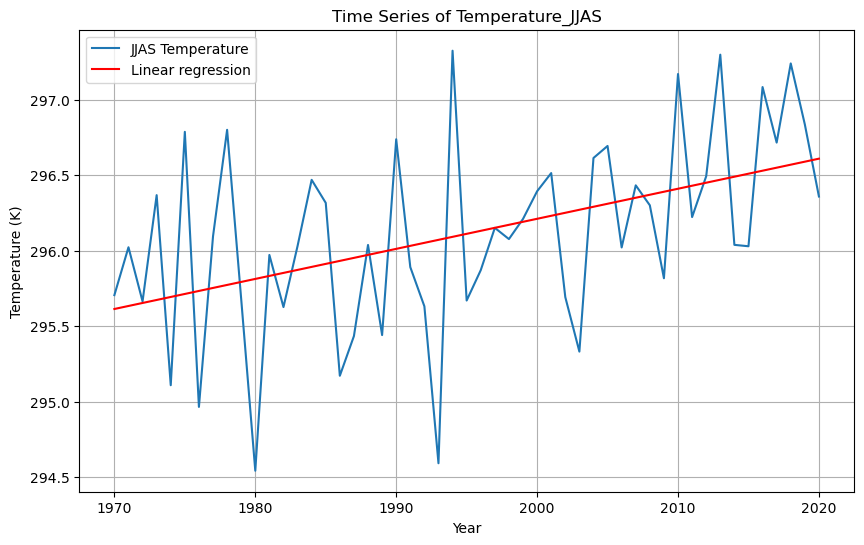

0.45671754216343685
0.0007548925362361973
0.019928983800551473


In [13]:
temp = data2['t']
jjas_data_temp = temp.sel(time=temp['time'].dt.month.isin([6,7,8,9]))
jjas_temp = jjas_data_temp.resample(time='1Y').mean()
Spatial_mean_jjas_temp = jjas_temp.mean(dim=['latitude','longitude'])
Spatial_mean_jjas_temp = Spatial_mean_jjas_temp[:,1]
years = Spatial_mean_jjas_temp["time.year"]
slope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_temp)

plt.figure(figsize=(10,6))
plt.plot(years,Spatial_mean_jjas_temp,label="JJAS Temperature")
plt.plot(years,slope*years+intercept,label="Linear regression",color='red')
plt.xlabel("Year")
plt.ylabel("Temperature (K)")
plt.title("Time Series of Temperature_JJAS")
plt.legend()
plt.grid(True)
#plt.savefig("Time Series of Temperature")
plt.show()

print(r_value)
print(p_value)
print(slope)

In [14]:
"""temp = data2['q']
jjas_data_temp = temp.sel(time=temp['time'].dt.month.isin([6,7,8,9]))
jjas_temp = jjas_data_temp.resample(time='1Y').mean()
Spatial_mean_jjas_temp = jjas_temp.mean(dim=['latitude','longitude'])
Spatial_mean_jjas_temp = Spatial_mean_jjas_temp[:,1]
years = Spatial_mean_jjas_temp["time.year"]
slope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_temp)

plt.figure(figsize=(10,6))
plt.plot(years,Spatial_mean_jjas_temp,label="JJAS Temperature")
plt.plot(years,slope*years+intercept,label="Linear regression",color='red')
plt.xlabel("Year")
plt.ylabel("q (kg/kg)")
plt.title("Time Series of q_JJAS")
plt.legend()
plt.grid(True)
#plt.savefig("Time Series of Temperature")
plt.show()

print(r_value)
print(p_value)
print(slope)"""

'temp = data2[\'q\']\njjas_data_temp = temp.sel(time=temp[\'time\'].dt.month.isin([6,7,8,9]))\njjas_temp = jjas_data_temp.resample(time=\'1Y\').mean()\nSpatial_mean_jjas_temp = jjas_temp.mean(dim=[\'latitude\',\'longitude\'])\nSpatial_mean_jjas_temp = Spatial_mean_jjas_temp[:,1]\nyears = Spatial_mean_jjas_temp["time.year"]\nslope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_temp)\n\nplt.figure(figsize=(10,6))\nplt.plot(years,Spatial_mean_jjas_temp,label="JJAS Temperature")\nplt.plot(years,slope*years+intercept,label="Linear regression",color=\'red\')\nplt.xlabel("Year")\nplt.ylabel("q (kg/kg)")\nplt.title("Time Series of q_JJAS")\nplt.legend()\nplt.grid(True)\n#plt.savefig("Time Series of Temperature")\nplt.show()\n\nprint(r_value)\nprint(p_value)\nprint(slope)'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


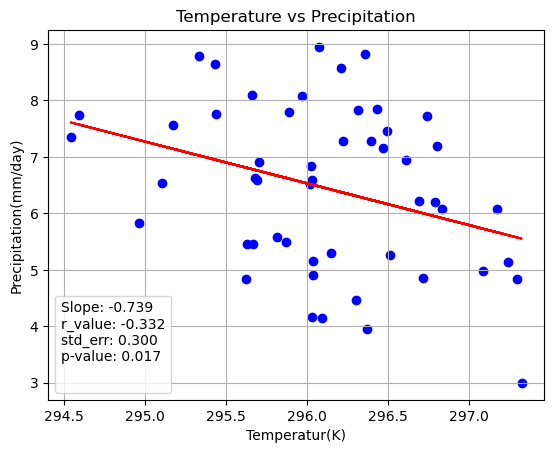

Slope: -0.739
r_value: -0.332
std_err: 0.300
p-value: 0.017



In [15]:
slope,intercept,r_value,p_value,std_err = linregress(Spatial_mean_jjas_temp,Spatial_mean_jjas_pr)
years = Spatial_mean_jjas_temp["time.year"]
plt.scatter(Spatial_mean_jjas_temp,Spatial_mean_jjas_pr,color='b')
plt.plot(Spatial_mean_jjas_temp,slope*Spatial_mean_jjas_temp+intercept,color='red')
plt.xlabel("Temperatur(K)")
plt.ylabel("Precipitation(mm/day)")
plt.title("Temperature vs Precipitation")
legend_text = (f"Slope: {slope:.3f}\n"
               f"r_value: {r_value:.3f}\n"
               f"std_err: {std_err:.3f}\n"
               f"p-value: {p_value:.3f}\n")
plt.grid(True)       
plt.legend(title=legend_text,loc='best')
plt.show()
print(legend_text)

In [16]:
"""------------------------------------------HomeWork----------------------------------------------------"""
"""                                                                                                      """
"""                                                                                                      """ 
"""                                                                                                      """
"""                                                                                                      """
"""                                                                                                      """
"""                                                                                                      """
"""                                                                                                      """
"""                                                                                                      """
"""------------------------------------------HomeWork----------------------------------------------------"""
import xarray as xr # reads and handles netcdf files with metadata
import numpy as np   # module for numerical computing
import pandas as pd # module for data manipulation and analysis
import geopandas as gpd
import matplotlib.pyplot as plt  #essential for plotting
import cartopy.crs as ccrs  #important for  map projections
import netCDF4 as nc
path2 = "C:/Users/user/Downloads/Met_data/T_RH_q_S_Korea_1970-2020_monthly.nc"
country = "South_Korea"
data2 = xr.open_dataset(path2)

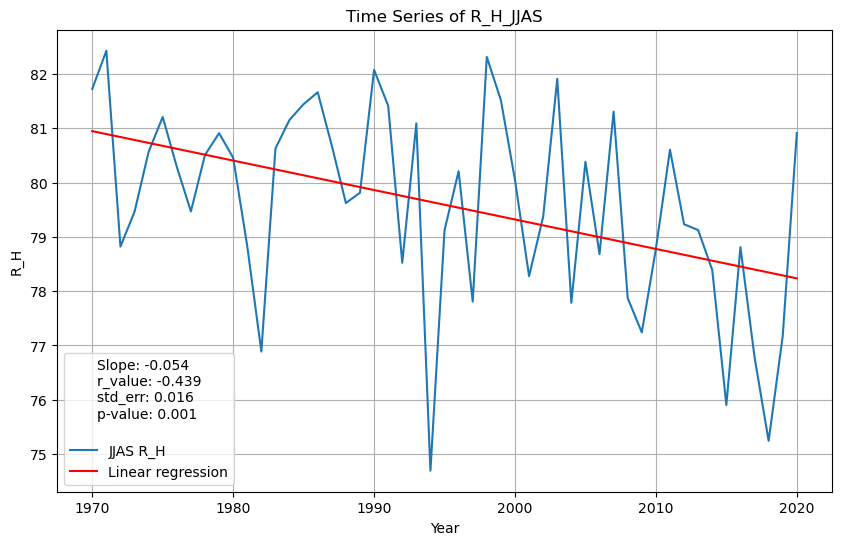

-0.43937604438328964
0.0012564156487050488
-0.05424002392799067


In [26]:
R_H = data2['r']
jjas_data_R_H = R_H.sel(time=R_H['time'].dt.month.isin([6,7,8,9]))
jjas_R_H = jjas_data_R_H.resample(time='1Y').mean()
Spatial_mean_jjas_R_H = jjas_R_H.mean(dim=['latitude','longitude'])
Spatial_mean_jjas_R_H = Spatial_mean_jjas_R_H[:,1]
years = Spatial_mean_jjas_R_H["time.year"]
slope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_R_H)

plt.figure(figsize=(10,6))
plt.plot(years,Spatial_mean_jjas_R_H,label="JJAS R_H")
plt.plot(years,slope*years+intercept,label="Linear regression",color='red')
plt.xlabel("Year")
plt.ylabel("R_H")
plt.title("Time Series of R_H_JJAS")
legend_text = (f"Slope: {slope:.3f}\n"
               f"r_value: {r_value:.3f}\n"
               f"std_err: {std_err:.3f}\n"
               f"p-value: {p_value:.3f}\n")
plt.legend(title=legend_text)
plt.grid(True)
#plt.savefig("Time Series of Temperature")
plt.show()

print(r_value)
print(p_value)
print(slope)

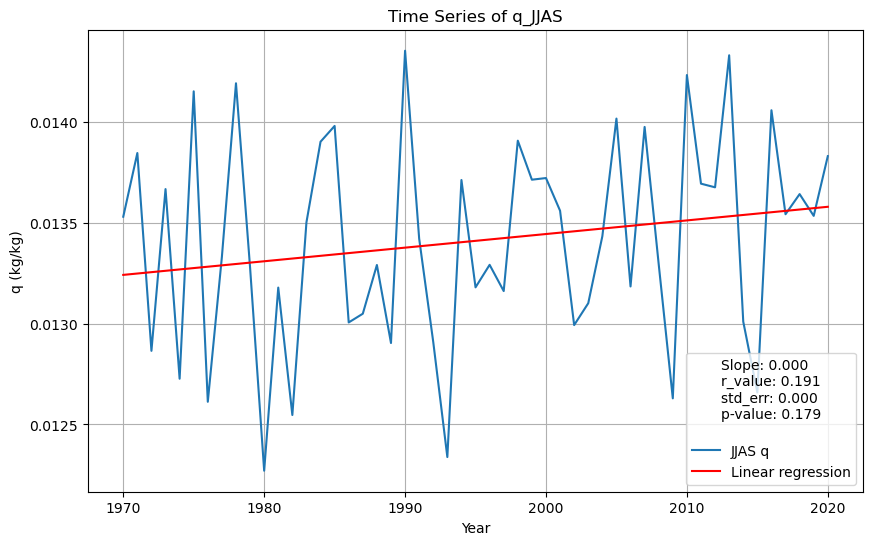

0.19125831248237365
0.178804404007113
6.759764365346186e-06


In [25]:
q = data2['q']
jjas_data_q = q.sel(time=q['time'].dt.month.isin([6,7,8,9]))
jjas_q = jjas_data_q.resample(time='1Y').mean()
Spatial_mean_jjas_q = jjas_q.mean(dim=['latitude','longitude'])
Spatial_mean_jjas_q = Spatial_mean_jjas_q[:,1]
years = Spatial_mean_jjas_q["time.year"]
slope,intercept,r_value,p_value,std_err = linregress(years,Spatial_mean_jjas_q)

plt.figure(figsize=(10,6))
plt.plot(years,Spatial_mean_jjas_q,label="JJAS q")
plt.plot(years,slope*years+intercept,label="Linear regression",color='red')
plt.xlabel("Year")
plt.ylabel("q (kg/kg)")
plt.title("Time Series of q_JJAS")
legend_text = (f"Slope: {slope:.3f}\n"
               f"r_value: {r_value:.3f}\n"
               f"std_err: {std_err:.3f}\n"
               f"p-value: {p_value:.3f}\n")
plt.legend(title=legend_text)
plt.grid(True)
#plt.savefig("Time Series of Temperature")
plt.show()

print(r_value)
print(p_value)
print(slope)

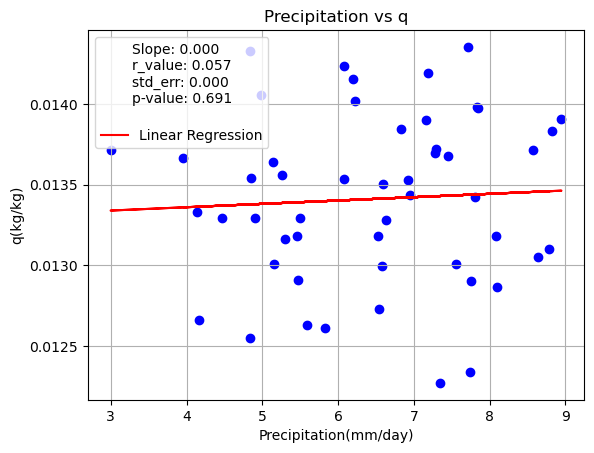

Slope: 0.000
r_value: 0.057
std_err: 0.000
p-value: 0.691



In [27]:
slope,intercept,r_value,p_value,std_err = linregress(Spatial_mean_jjas_pr,Spatial_mean_jjas_q)
years = Spatial_mean_jjas_pr["time.year"]
plt.scatter(Spatial_mean_jjas_pr,Spatial_mean_jjas_q,color='b')
plt.plot(Spatial_mean_jjas_pr,slope*Spatial_mean_jjas_pr+intercept,color='red',label="Linear Regression")
plt.xlabel("Precipitation(mm/day)")
plt.ylabel("q(kg/kg)")
plt.title("Precipitation vs q")
legend_text = (f"Slope: {slope:.3f}\n"
               f"r_value: {r_value:.3f}\n"
               f"std_err: {std_err:.3f}\n"
               f"p-value: {p_value:.3f}\n")
plt.grid(True)       
plt.legend(title=legend_text,loc='best')
plt.show()
print(legend_text)

<xarray.DataArray 'tp' (time: 51)>
array([ 7.780823 ,  5.6952643, 10.444255 ,  3.1067336,  6.222224 ,
        6.4462624,  6.191126 ,  5.895221 ,  4.8257523,  6.609053 ,
        9.496902 ,  6.424172 ,  6.6786447,  8.314988 ,  6.602891 ,
       10.34385  ,  7.6805124,  8.954679 ,  6.141919 ,  7.951578 ,
        5.5247946,  8.983501 ,  5.408746 ,  9.792619 ,  2.670508 ,
        5.03045  ,  5.166787 ,  6.805123 ,  6.434316 ,  8.851335 ,
        6.207529 ,  5.972397 ,  5.2853966,  7.7024145,  5.5262165,
        6.0411353,  8.022781 ,  5.7887483,  4.6513   ,  4.959246 ,
        5.879672 ,  5.1952314,  6.730032 ,  5.256858 ,  5.8251557,
        7.208733 ,  7.7321854,  4.6400175,  7.24277  ,  9.677708 ,
        7.978978 ], dtype=float32)
Coordinates:
    longitude  float32 129.4
    latitude   float32 34.39
  * time       (time) datetime64[ns] 1970-12-31 1971-12-31 ... 2020-12-31


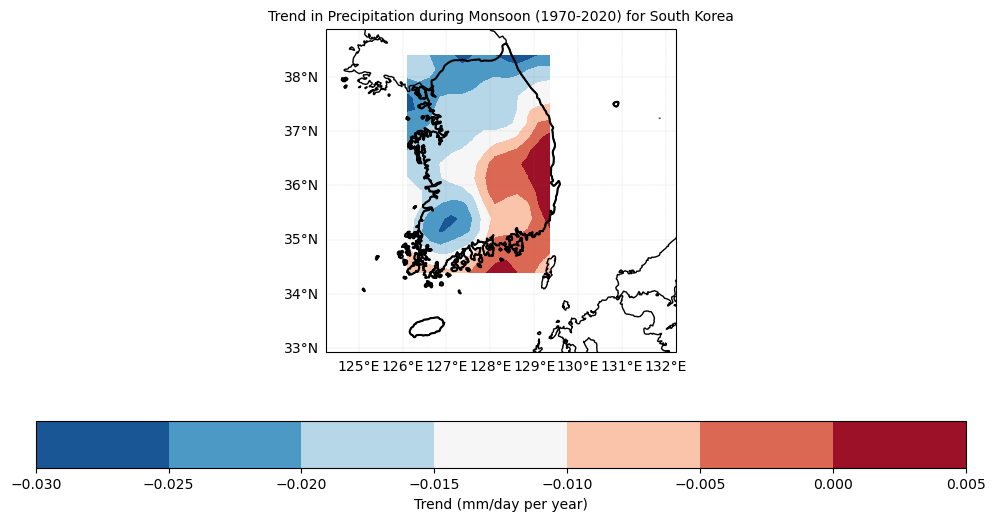

In [32]:
#Assign the latitude and longitude as two variables lat and lon respectively
data1 = xr.open_dataset(path1)

lat = data1['latitude'] #since it is precipitation we are extracting the latitude from data1 for other variable it should be data2
lon = data1['longitude']

country= 'South Korea' # Write Your Own Country Name
shapefile_path = 'C:/Users/user/Downloads/ShapeFiles/kr.shp' #give the path of the shape file for your own country
# Load the shapefile using geopandas
shapefile = gpd.read_file(shapefile_path)

#Create an 2D array named trend 
trend = np.empty((len(lat), len(lon))) #2D arrary as [(lat,lon)....] format if you want to see then can print trend after the for loop

# Calculate the trend at each grid point
for i in range(len(lat)):
    for j in range(len(lon)):
        y = jjas_pr[:, i, j]
        slope,intercept, r_value, p_value, std_err = linregress(years, y)
        trend[i, j] = slope
print(y)
#Print(trend)
# 
# Convert the trend array to an xarray.DataArray
trend_da = xr.DataArray(trend, coords=[lat, lon], dims=['latitude', 'longitude'])

# Plotting (This part is very similar to the plotting of climatology spatial plot )
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Create a meshgrid for the contour plot
lon_grid, lat_grid = np.meshgrid(trend_da['longitude'], trend_da['latitude'])

# Plot the trend data
contour = ax.contourf(lon_grid, lat_grid, trend_da, transform=ccrs.PlateCarree(), cmap='RdBu_r')
plt.colorbar(contour, ax=ax, orientation='horizontal', label='Trend (mm/day per year)')

# Overlay the shapefile boundaries
shapefile.boundary.plot(ax=ax, edgecolor='black', linewidth=1.5)

# Title and labels
plt.title(f'Trend in Precipitation during Monsoon (1970-2020) for {country}', fontsize=10)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.show()

#save Each plot using the command for saving the plot.